# Anscombe四重奏（Anscombe's quartet）

https://github.com/mwaskom/seaborn-data

需要先下载数据集（URLERROR），解压到本地seaborn-data文件中

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
anscombe = sns.load_dataset('anscombe')

In [3]:
print(anscombe.head())

  dataset     x     y
0       I  10.0  8.04
1       I   8.0  6.95
2       I  13.0  7.58
3       I   9.0  8.81
4       I  11.0  8.33


> dataset_1 = anscombe[anscombe['dataset']=='I']

> plt.plot(dataset_1['x'],dataset_1['y'])

>plt.plot(dataset_1['x'],dataset_1['y'],'o')

In [21]:
import matplotlib.pyplot as plt    #创建自定义图像
%matplotlib inline

<Figure size 288x216 with 0 Axes>

In [ ]:
dataset_1 = anscombe[anscombe['dataset']=='I']
dataset_2 = anscombe[anscombe['dataset']=='II']
dataset_3 = anscombe[anscombe['dataset']=='III']
dataset_4 = anscombe[anscombe['dataset']=='IV']

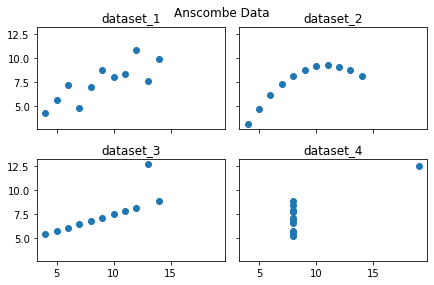

In [65]:
#创建一块2 x 2的画布,存在子图
fig,ax= plt.subplots(2, 2, sharex='all', sharey='all')

ax[0][0].plot(dataset_1['x'],dataset_1['y'],'o')
ax[0][1].plot(dataset_2['x'],dataset_2['y'],'o')
ax[1][0].plot(dataset_3['x'],dataset_3['y'],'o')
ax[1][1].plot(dataset_4['x'],dataset_4['y'],'o')
#子图添加标题
ax[0][0].set_title("dataset_1")
ax[0][1].set_title("dataset_2")
ax[1][0].set_title("dataset_3")
ax[1][1].set_title("dataset_4")
#大图添加标题
fig.suptitle("Anscombe Data")
#紧凑布局
fig.tight_layout()

#保存为图片
plt.savefig('../output/fig.jpg')

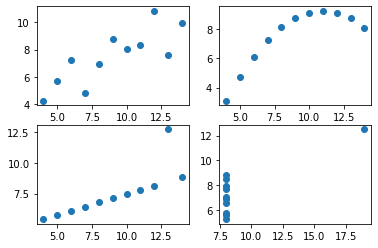

In [51]:
plt.subplot(2,2,1)
plt.plot(dataset_1['x'],dataset_1['y'],'o')
plt.subplot(2,2,2)
plt.plot(dataset_2['x'],dataset_2['y'],'o')
plt.subplot(2,2,3)
plt.plot(dataset_3['x'],dataset_3['y'],'o')
plt.subplot(2,2,4)
plt.plot(dataset_4['x'],dataset_4['y'],'o')

# 使用matplotlib绘制统计图

#### tips数据集,包含某个餐厅服务员收集的客户付小费的相关数据,包含总费用,聚餐人数,星期几和用餐时间等

In [2]:
tips = sns.load_dataset("tips")
print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


## 单变量（univariate）

Text(0, 0.5, 'Total Bill')

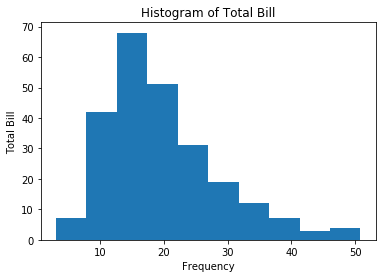

In [3]:
#直方图
fig = plt.figure()
axes1 = fig.add_subplot(111)
axes1.hist(tips['total_bill'],bins=10)
axes1.set_title("Histogram of Total Bill")
axes1.set_xlabel("Frequency")
axes1.set_ylabel("Total Bill")


## 双变量（bivariate）

Text(0, 0.5, 'Tip')

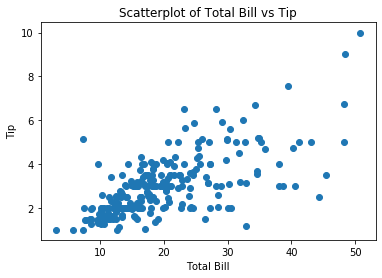

In [4]:
#散点图（表示一个变量随另一个连续变量的变化所呈现的大致趋势）
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(111)
axes1.scatter(tips['total_bill'],tips['tip'])
axes1.set_title("Scatterplot of Total Bill vs Tip")
axes1.set_xlabel("Total Bill")
axes1.set_ylabel("Tip")


Text(0.5, 1.0, 'Boxplot of Tips by Gender')

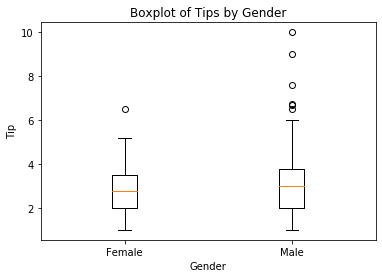

In [5]:
#箱线图（展示一个离散变量随连续变量的变化而呈现的分布状态）
boxplot = plt.figure()
axes1 = boxplot.add_subplot(111)
axes1.boxplot(
    #箱线图的第一个参数是数据，由于要绘制多块数据，因此必须把每块数据放入列表中
    [
        tips[tips['sex'] == 'Female']['tip'],
        tips[tips['sex'] == 'Male']['tip']
    ],
    #传入一个可选的标签参数，用来标记传递的数据
    labels = ['Female','Male']
)
axes1.set_xlabel('Gender')
axes1.set_ylabel('Tip')
axes1.set_title("Boxplot of Tips by Gender")

## 多变量数据（使用颜色，matplotlivb，seaborn自带调色，也可使用colorbrewer）

Text(0.5, 1.0, 'Total Bill vs Tip Color by Gender and Sized by size')

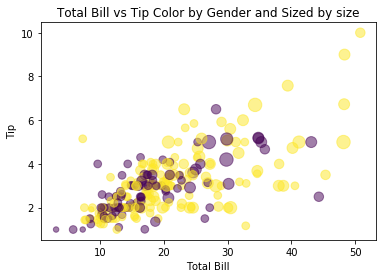

In [13]:
#基于性别创建一个带颜色的变量
def recode_gender(gender):
    if gender =="Female":
        return 0
    else:
        return 1
tips['gender_color'] = tips['sex'].apply(recode_gender)

scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(111)
axes1.scatter(
    x=tips['total_bill'],
    y=tips['tip'],
    
    #根据聚餐人数设置点的大小，乘上10放大效果
    s=tips['size']*30,
    
    #为性别设置颜色
    c=tips['gender_color'],
    
    #设置alpha值，增加点的透明度
    alpha=0.5
)
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')
axes1.set_title("Total Bill vs Tip Color by Gender and Sized by size")